In [1]:

import os
import torch
from torch.utils.data import Dataset, DataLoader
import pydicom
import numpy as np
from torchvision import transforms
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import torch.nn as nn
from torch.utils.data import random_split
from model import MedicalImageCNN, CNNToRNA, train_model
import matplotlib.pyplot as plt

from helper import collate_fn
device = torch.device("cpu")

this shows that the image loader works, in rna preprocessing we already sorted everything so no worries and can take index to simply get the indexeth important gene

In [1]:

from helper import PatientDicomDatasetSingleGeneByIndex

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
if not os.path.exists('data/Images/NSCLC Radiogenomics'):
         raise FileNotFoundError("The directory 'data/Images/NSCLC Radiogenomics' does not exist.")
if not os.path.exists('data/df_zscore.csv'):
         raise FileNotFoundError("The file 'data/df_zscore.csv' does not exist.")
# Verify that the dataset is properly loaded
dataset =PatientDicomDatasetSingleGeneByIndex(root_dir='data/Images/NSCLC Radiogenomics', csv_path='data/df_zscore.csv', transform=transform, index=3)

# Check the length of the dataset to ensure it is not empty
if len(dataset) == 0:
    raise ValueError("The dataset is empty. Please check the root_dir and csv_path for correctness.")
print("Dataset length:", len(dataset))

images, patient_id, gene_value, gene_name = dataset[2]

print("Image tensor shape:", images[0].shape)
print('gene_value:', gene_value)
print('gene_name:', gene_name)

NameError: name 'transforms' is not defined

In [3]:
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

now we are going to train a model for each gene and extract the train loses and val losses to identify meaningful genes

lets do the top 10

Using device: cuda
Loading CSV and images...
⚠️ Skipping patient R01-059 due to NaN gene value for CASP2
Training model for gene: CASP2 (Index: 4)

Epoch [1/50]


Train Loss: 0.5778 | Val Loss: 1.7337

Epoch [2/50]


Train Loss: 0.5645 | Val Loss: 1.7692

Epoch [3/50]


Train Loss: 0.5487 | Val Loss: 1.7988
⏹️ Early stopping triggered at epoch 3
Finished training for gene: CASP2
Loading CSV and images...
⚠️ Skipping patient R01-005 due to NaN gene value for DLG2
⚠️ Skipping patient R01-037 due to NaN gene value for DLG2
⚠️ Skipping patient R01-046 due to NaN gene value for DLG2
⚠️ Skipping patient R01-052 due to NaN gene value for DLG2
⚠️ Skipping patient R01-054 due to NaN gene value for DLG2
⚠️ Skipping patient R01-059 due to NaN gene value for DLG2
⚠️ Skipping patient R01-069 due to NaN gene value for DLG2
⚠️ Skipping patient R01-072 due to NaN gene value for DLG2
⚠️ Skipping patient R01-150 due to NaN gene value for DLG2
⚠️ Skipping patient R01-157 due to NaN gene value for DLG2
Training model for gene: DLG2 (Index: 5)

Epoch [1/50]


Train Loss: 0.9686 | Val Loss: 1.0947

Epoch [2/50]


Train Loss: 0.9803 | Val Loss: 1.0956

Epoch [3/50]


Train Loss: 0.9770 | Val Loss: 1.0987
⏹️ Early stopping triggered at epoch 3
Finished training for gene: DLG2
Loading CSV and images...
⚠️ Skipping patient R01-018 due to NaN gene value for DNAL1
Training model for gene: DNAL1 (Index: 6)

Epoch [1/50]


Train Loss: 1.3128 | Val Loss: 0.3832

Epoch [2/50]


Train Loss: 1.2597 | Val Loss: 0.3891

Epoch [3/50]


Train Loss: 1.2444 | Val Loss: 0.4009
⏹️ Early stopping triggered at epoch 3
Finished training for gene: DNAL1
Loading CSV and images...
⚠️ Skipping patient R01-004 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-043 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-052 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-056 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-062 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-077 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-094 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-153 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-156 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-157 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-159 due to NaN gene value for ANKRD30BL
Training model for gene: ANKRD30BL (Index: 7)

Epoch [1/50]


Train Loss: 1.0416 | Val Loss: 0.7968

Epoch [2/50]


Train Loss: 0.9999 | Val Loss: 0.8128

Epoch [3/50]


Train Loss: 0.9903 | Val Loss: 0.8054
⏹️ Early stopping triggered at epoch 3
Finished training for gene: ANKRD30BL
Loading CSV and images...
⚠️ Skipping patient R01-051 due to NaN gene value for ORAI2
⚠️ Skipping patient R01-052 due to NaN gene value for ORAI2
⚠️ Skipping patient R01-069 due to NaN gene value for ORAI2
Training model for gene: ORAI2 (Index: 8)

Epoch [1/50]


Train Loss: 1.2149 | Val Loss: 0.6231

Epoch [2/50]


Train Loss: 1.1837 | Val Loss: 0.6253

Epoch [3/50]


Train Loss: 1.1772 | Val Loss: 0.6301
⏹️ Early stopping triggered at epoch 3
Finished training for gene: ORAI2
Loading CSV and images...
⚠️ Skipping patient R01-013 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-018 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-021 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-022 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-027 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-037 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-052 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-061 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-065 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-069 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-073 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-093 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-096 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-160 due to NaN gene value for PDE3A
Training model for gene

Train Loss: 1.0930 | Val Loss: 1.1984

Epoch [2/50]


Train Loss: 0.9109 | Val Loss: 0.9685

Epoch [3/50]


Train Loss: 0.7173 | Val Loss: 0.5420

Epoch [4/50]


Train Loss: 0.6111 | Val Loss: 0.5848

Epoch [5/50]


Train Loss: 0.5630 | Val Loss: 0.3470

Epoch [6/50]


Train Loss: 0.6289 | Val Loss: 0.3155

Epoch [7/50]


Train Loss: 0.4990 | Val Loss: 0.9548

Epoch [8/50]


Train Loss: 0.6249 | Val Loss: 0.6389
⏹️ Early stopping triggered at epoch 8
Finished training for gene: PDE3A
Loading CSV and images...
Training model for gene: SEC22A (Index: 10)

Epoch [1/50]


Train Loss: 1.5024 | Val Loss: 0.1891

Epoch [2/50]


Train Loss: 1.3487 | Val Loss: 0.2002

Epoch [3/50]


Train Loss: 1.3642 | Val Loss: 0.2135
⏹️ Early stopping triggered at epoch 3
Finished training for gene: SEC22A
Loading CSV and images...
Training model for gene: SYPL1 (Index: 11)

Epoch [1/50]


Train Loss: 1.0561 | Val Loss: 0.6857

Epoch [2/50]


Train Loss: 1.0182 | Val Loss: 0.6878

Epoch [3/50]


Train Loss: 1.0087 | Val Loss: 0.7838
⏹️ Early stopping triggered at epoch 3
Finished training for gene: SYPL1
Loading CSV and images...
⚠️ Skipping patient R01-022 due to NaN gene value for RCOR1
⚠️ Skipping patient R01-037 due to NaN gene value for RCOR1
Training model for gene: RCOR1 (Index: 12)

Epoch [1/50]


Train Loss: 1.0173 | Val Loss: 2.1966

Epoch [2/50]


Train Loss: 1.0201 | Val Loss: 1.9607

Epoch [3/50]


Train Loss: 1.0045 | Val Loss: 1.9147

Epoch [4/50]


Train Loss: 0.9957 | Val Loss: 1.9161

Epoch [5/50]


Train Loss: 0.9912 | Val Loss: 1.9107

Epoch [6/50]


Train Loss: 0.9914 | Val Loss: 1.9136

Epoch [7/50]


Train Loss: 0.9910 | Val Loss: 1.9154
⏹️ Early stopping triggered at epoch 7
Finished training for gene: RCOR1
Loading CSV and images...
Training model for gene: SAV1 (Index: 13)

Epoch [1/50]


Train Loss: 1.3332 | Val Loss: 0.7092

Epoch [2/50]


Train Loss: 1.2652 | Val Loss: 0.7160

Epoch [3/50]


Train Loss: 1.2284 | Val Loss: 0.7247
⏹️ Early stopping triggered at epoch 3
Finished training for gene: SAV1


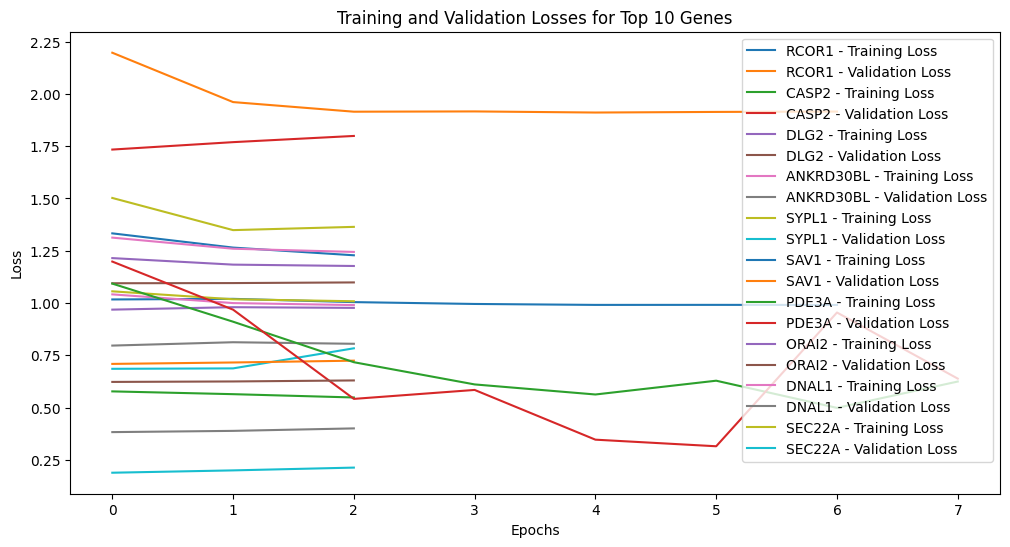

RuntimeError: Parent directory models does not exist.

In [ ]:

criterion = nn.MSELoss()

batch_size = 1
#want to store the models for each gene, the list of losses, list of vals, gene name as uid
gene_performance = {}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for gene_idx in range(4,14):
    

    # Update the dataset index for the current gene
    dataset = PatientDicomDatasetSingleGeneByIndex(
        root_dir='data/Images/NSCLC Radiogenomics',
        csv_path='data/df_zscore.csv',
        transform=transform,
        index=gene_idx
    )
    train_size = int(0.7 * len(dataset))
    val_size = int(0.15 * len(dataset))
    test_size = len(dataset) - train_size - val_size

    # Split the dataset
    train_dataset, val_dataset, test_dataset = random_split(
        dataset, [train_size, val_size, test_size]
    )
    _,_,_,gene_name = dataset[0]
    print(f"Training model for gene: {gene_name} (Index: {gene_idx})")
    # Update DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    # Create a new model for the current gene
    model = CNNToRNA(
        cnn_encoder=MedicalImageCNN(output_dim=128),
        embedding_dim=128,
        output_dim=1  # Single output for the current gene
    )
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


    # Train the model
    train_losses, val_losses = train_model(
        model, train_loader, val_loader,
        criterion, optimizer, device, patience=2
    )

    # Store the losses for the current gene
    gene_performance[gene_name] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'model': model,
        'total_lost': val_losses[-1],  # Store the last validation loss
        'gene_name': gene_name
    }

    print(f"Finished training for gene: {gene_name}")


#sort by total_lost in descending order
gene_performance = dict(sorted(gene_performance.items(), key=lambda item: item[1]['total_lost'], reverse=True))

# Visualize losses for top 10 genes
top_genes = list(gene_performance.keys())[:10]
# top genes structure: {'gene_name': {'train_losses': [...], 'val_losses': [...], 'model': model, 'total_lost': value}}
plt.figure(figsize=(12, 6))
gene_losses = {gene: gene_performance[gene] for gene in top_genes}
for gene, losses in gene_losses.items():
    plt.plot(losses['train_losses'], label=f'{gene} - Training Loss')
    plt.plot(losses['val_losses'], label=f'{gene} - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses for Top 10 Genes')
plt.legend()
plt.show()


#save the top model
top_gene = list(gene_performance.keys())[0]
top_model = gene_performance[top_gene]['model']
torch.save(top_model, f'models/top_gene_model_{top_gene}.pth')



In [9]:
top_model = gene_performance[top_gene]['model']
torch.save(top_model, f'models/top_gene_model_{top_gene}.pth')

In [10]:
import torch
import numpy as np
from tqdm import tqdm

def test_model(model, test_loader, device):
    model.eval()
    model.to(device)

    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for images, _, gene_values, _ in tqdm(test_loader, desc="Testing", leave=False):
            images = images.to(device)
            gene_values = gene_values.to(device)

            outputs = model(images)

            all_predictions.append(outputs.cpu().numpy())
            all_targets.append(gene_values.cpu().numpy())

    preds = np.concatenate(all_predictions, axis=0)
    targets = np.concatenate(all_targets, axis=0)

    return preds, targets

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
preds, labels = test_model(model, test_loader, device)

print("Test MSE:", mean_squared_error(labels, preds))
print("Test R² :", r2_score(labels, preds))  # Good for regression quality

Test MSE: 0.1547759473323822
Test R² : -9.104867935180664


Using device: cuda
Loading CSV and images...
Training model for gene: TOR1AIP1 (Index: 0)

Epoch [1/50]
                                                           
Train Loss: 1.2124 | Val Loss: 1.0963

Epoch [2/50]
                                                           
Train Loss: 0.9965 | Val Loss: 1.1295

Epoch [3/50]
                                                           
Train Loss: 0.9968 | Val Loss: 1.0111

Epoch [4/50]
                                                           
Train Loss: 1.0476 | Val Loss: 1.0684

Epoch [5/50]
                                                           
Train Loss: 0.9974 | Val Loss: 1.1030
⏹️ Early stopping triggered at epoch 5
Finished training for gene: T
Loading CSV and images...
Training model for gene: CHD7 (Index: 1)

Epoch [1/50]
                                                           
Train Loss: 1.0388 | Val Loss: 0.9577

Epoch [2/50]
                                                           
Train Loss: 1.0117 | Val Loss: 0.9599

Epoch [3/50]
                                                           
Train Loss: 0.9990 | Val Loss: 0.9664
⏹️ Early stopping triggered at epoch 3
Finished training for gene: H
Loading CSV and images...
Training model for gene: ZFYVE26 (Index: 2)

Epoch [1/50]
                                                           
Train Loss: 1.0488 | Val Loss: 1.2646

Epoch [2/50]
                                                           
Train Loss: 0.9712 | Val Loss: 1.3228

Epoch [3/50]
                                                           
Train Loss: 0.9699 | Val Loss: 1.2495

Epoch [4/50]
                                                           
Train Loss: 0.9638 | Val Loss: 1.2301

Epoch [5/50]
                                                           
Train Loss: 0.9582 | Val Loss: 1.2411

Epoch [6/50]
                                                           
Train Loss: 0.9625 | Val Loss: 1.2595
⏹️ Early stopping triggered at epoch 6
Finished training for gene: Y
Loading CSV and images...
⚠️ Skipping patient R01-105 due to NaN gene value for NAA38
⚠️ Skipping patient R01-117 due to NaN gene value for NAA38
Training model for gene: NAA38 (Index: 3)

Epoch [1/50]
                                                           
Train Loss: 1.1192 | Val Loss: 1.3882

Epoch [2/50]
                                                           
Train Loss: 1.0048 | Val Loss: 1.4121

Epoch [3/50]
                                                           
Train Loss: 1.0017 | Val Loss: 1.3954
⏹️ Early stopping triggered at epoch 3
Finished training for gene: 3
Loading CSV and images...
⚠️ Skipping patient R01-059 due to NaN gene value for CASP2
Training model for gene: CASP2 (Index: 4)

Epoch [1/50]
                                                           
Train Loss: 0.8814 | Val Loss: 1.2944

Epoch [2/50]
                                                           
Train Loss: 0.8641 | Val Loss: 1.2921

Epoch [3/50]
                                                           
Train Loss: 0.8583 | Val Loss: 1.2769

Epoch [4/50]
                                                           
Train Loss: 0.8601 | Val Loss: 1.2701

Epoch [5/50]
                                                           
Train Loss: 0.8577 | Val Loss: 1.2807

Epoch [6/50]
                                                           
Train Loss: 0.8582 | Val Loss: 1.2700
⏹️ Early stopping triggered at epoch 6
Finished training for gene: 2
Loading CSV and images...
⚠️ Skipping patient R01-005 due to NaN gene value for DLG2
⚠️ Skipping patient R01-037 due to NaN gene value for DLG2
⚠️ Skipping patient R01-046 due to NaN gene value for DLG2
⚠️ Skipping patient R01-052 due to NaN gene value for DLG2
⚠️ Skipping patient R01-054 due to NaN gene value for DLG2
⚠️ Skipping patient R01-059 due to NaN gene value for DLG2
⚠️ Skipping patient R01-069 due to NaN gene value for DLG2
⚠️ Skipping patient R01-072 due to NaN gene value for DLG2
⚠️ Skipping patient R01-150 due to NaN gene value for DLG2
⚠️ Skipping patient R01-157 due to NaN gene value for DLG2
Training model for gene: DLG2 (Index: 5)

Epoch [1/50]
                                                           
Train Loss: 1.0904 | Val Loss: 0.8995

Epoch [2/50]
                                                           
Train Loss: 0.9568 | Val Loss: 0.7646

Epoch [3/50]
                                                           
Train Loss: 0.5789 | Val Loss: 1.4091

Epoch [4/50]
                                                           
Train Loss: 0.4650 | Val Loss: 0.5233

Epoch [5/50]
                                                           
Train Loss: 0.4338 | Val Loss: 0.7821

Epoch [6/50]
                                                           
Train Loss: 0.2997 | Val Loss: 1.1243
⏹️ Early stopping triggered at epoch 6


^^had a bug with a print statement but wanted to document this